In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
data = pd.read_csv('/content/sample_data/spam.csv')

In [ ]:
data

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [ ]:
data.dtypes

Unnamed: 0     int64
label         object
text          object
label_num      int64
dtype: object

In [ ]:
data.describe()

,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


In [ ]:
data.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

Label Encoding

In [ ]:
data['label'] = pd.Categorical(data['label']).codes
data

,Unnamed: 0,label,text,label_num
0,605,0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,1,"Subject: photoshop , windows , office . cheap ...",1
4,2030,0,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,0,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,0,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,0,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,0,Subject: industrial worksheets for august 2000...,0


Splitting the independent and dependent variablese

In [ ]:
x = data['text'] #Independent variable
x.head(2)

0    Subject: enron methanol ; meter # : 988291\r\n...
1    Subject: hpl nom for january 9 , 2001\r\n( see...
Name: text, dtype: object

In [ ]:
y = data['label'] #Dependent variable
y.head(2)

0    0
1    0
Name: label, dtype: int8

Splitting the training and testing data¶

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

In [ ]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((4136,), (1035,), (4136,), (1035,))

Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer()

In [ ]:
xtrain = cv.fit_transform(xtrain)
xtest = cv.transform(xtest)

In [ ]:
print("Feature names:", cv.get_feature_names())

1.2 Logical Regression as Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log = LogisticRegression()

In [ ]:
model = log.fit(xtrain, ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
log_train_pred = model.predict(xtrain)
log_train_pred

array([0, 0, 1, ..., 0, 0, 1], dtype=int8)

In [ ]:
log_test_pred = model.predict(xtest)

In [ ]:
log_test_pred

array([0, 0, 1, ..., 0, 0, 1], dtype=int8)

Performance Metrics

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Accuracy Score

In [ ]:
print("Logistic Regression Training - Accuracy Score: ",accuracy_score(ytrain, log_train_pred))

Logistic Regression Training - Accuracy Score:  0.9997582205029013


In [ ]:
print("Logistic Regression Testing - Accuracy Score: ",accuracy_score(ytest, log_test_pred))

Logistic Regression Testing - Accuracy Score:  0.9758454106280193


Classification Report

In [ ]:
log_train_cr = classification_report(ytrain, log_train_pred)

In [ ]:
print("Logistic Regression Training - Classification Report \n\n", log_train_cr)

Logistic Regression Training - Classification Report 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2923
           1       1.00      1.00      1.00      1213

    accuracy                           1.00      4136
   macro avg       1.00      1.00      1.00      4136
weighted avg       1.00      1.00      1.00      4136



In [ ]:
log_test_cr = classification_report(ytest, log_test_pred)

In [ ]:
print("Logistic Regression Testing - Classification Report \n\n", log_test_cr)

Logistic Regression Testing - Classification Report 

               precision    recall  f1-score   support

           0       0.99      0.97      0.98       749
           1       0.93      0.98      0.96       286

    accuracy                           0.98      1035
   macro avg       0.96      0.98      0.97      1035
weighted avg       0.98      0.98      0.98      1035



Confusion Matrix

In [ ]:
log_train_cm = confusion_matrix(ytrain, log_train_pred)

In [ ]:
print("Logistic Regression Training - Confusion Matrix \n", log_train_cm)

Logistic Regression Training - Confusion Matrix 
 [[2940    1]
 [   0 1195]]


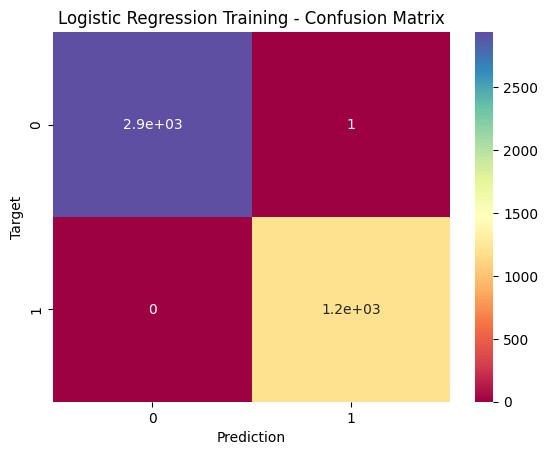

In [ ]:
sns.heatmap(log_train_cm, annot=True, cmap = 'Spectral')
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Logistic Regression Training - Confusion Matrix')
plt.show()

In [ ]:
log_test_cm = confusion_matrix(ytest, log_test_pred)

In [ ]:
print("Logistic Regression Testing - Confusion Matrix \n", log_test_cm)

Logistic Regression Testing - Confusion Matrix 
 [[703  28]
 [  6 298]]


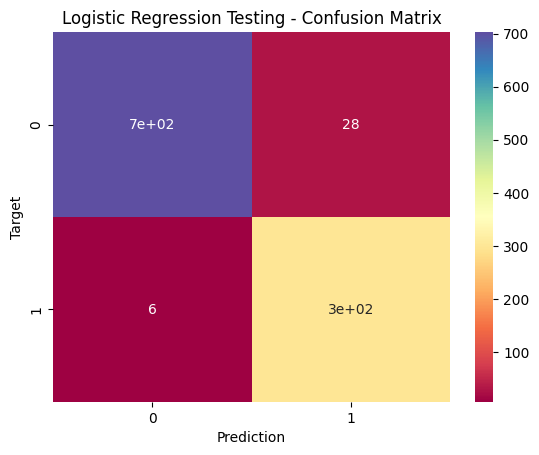

In [ ]:
sns.heatmap(log_test_cm, annot=True, cmap = 'Spectral')
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Logistic Regression Testing - Confusion Matrix')
plt.show()